In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [7]:
data.drop(data.columns[18:30],1,inplace=True)

In [8]:
data.drop(data.columns[11:18],1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [10]:
data.shape

(517, 12)

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [12]:
data['size_category'] = LabelEncoder().fit_transform(data['size_category'])

In [13]:
data['month'] = LabelEncoder().fit_transform(data['month'])

In [14]:
data['day'] = LabelEncoder().fit_transform(data['day'])

In [15]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [16]:
data.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
size_category      2
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [18]:
data.shape

(517, 12)

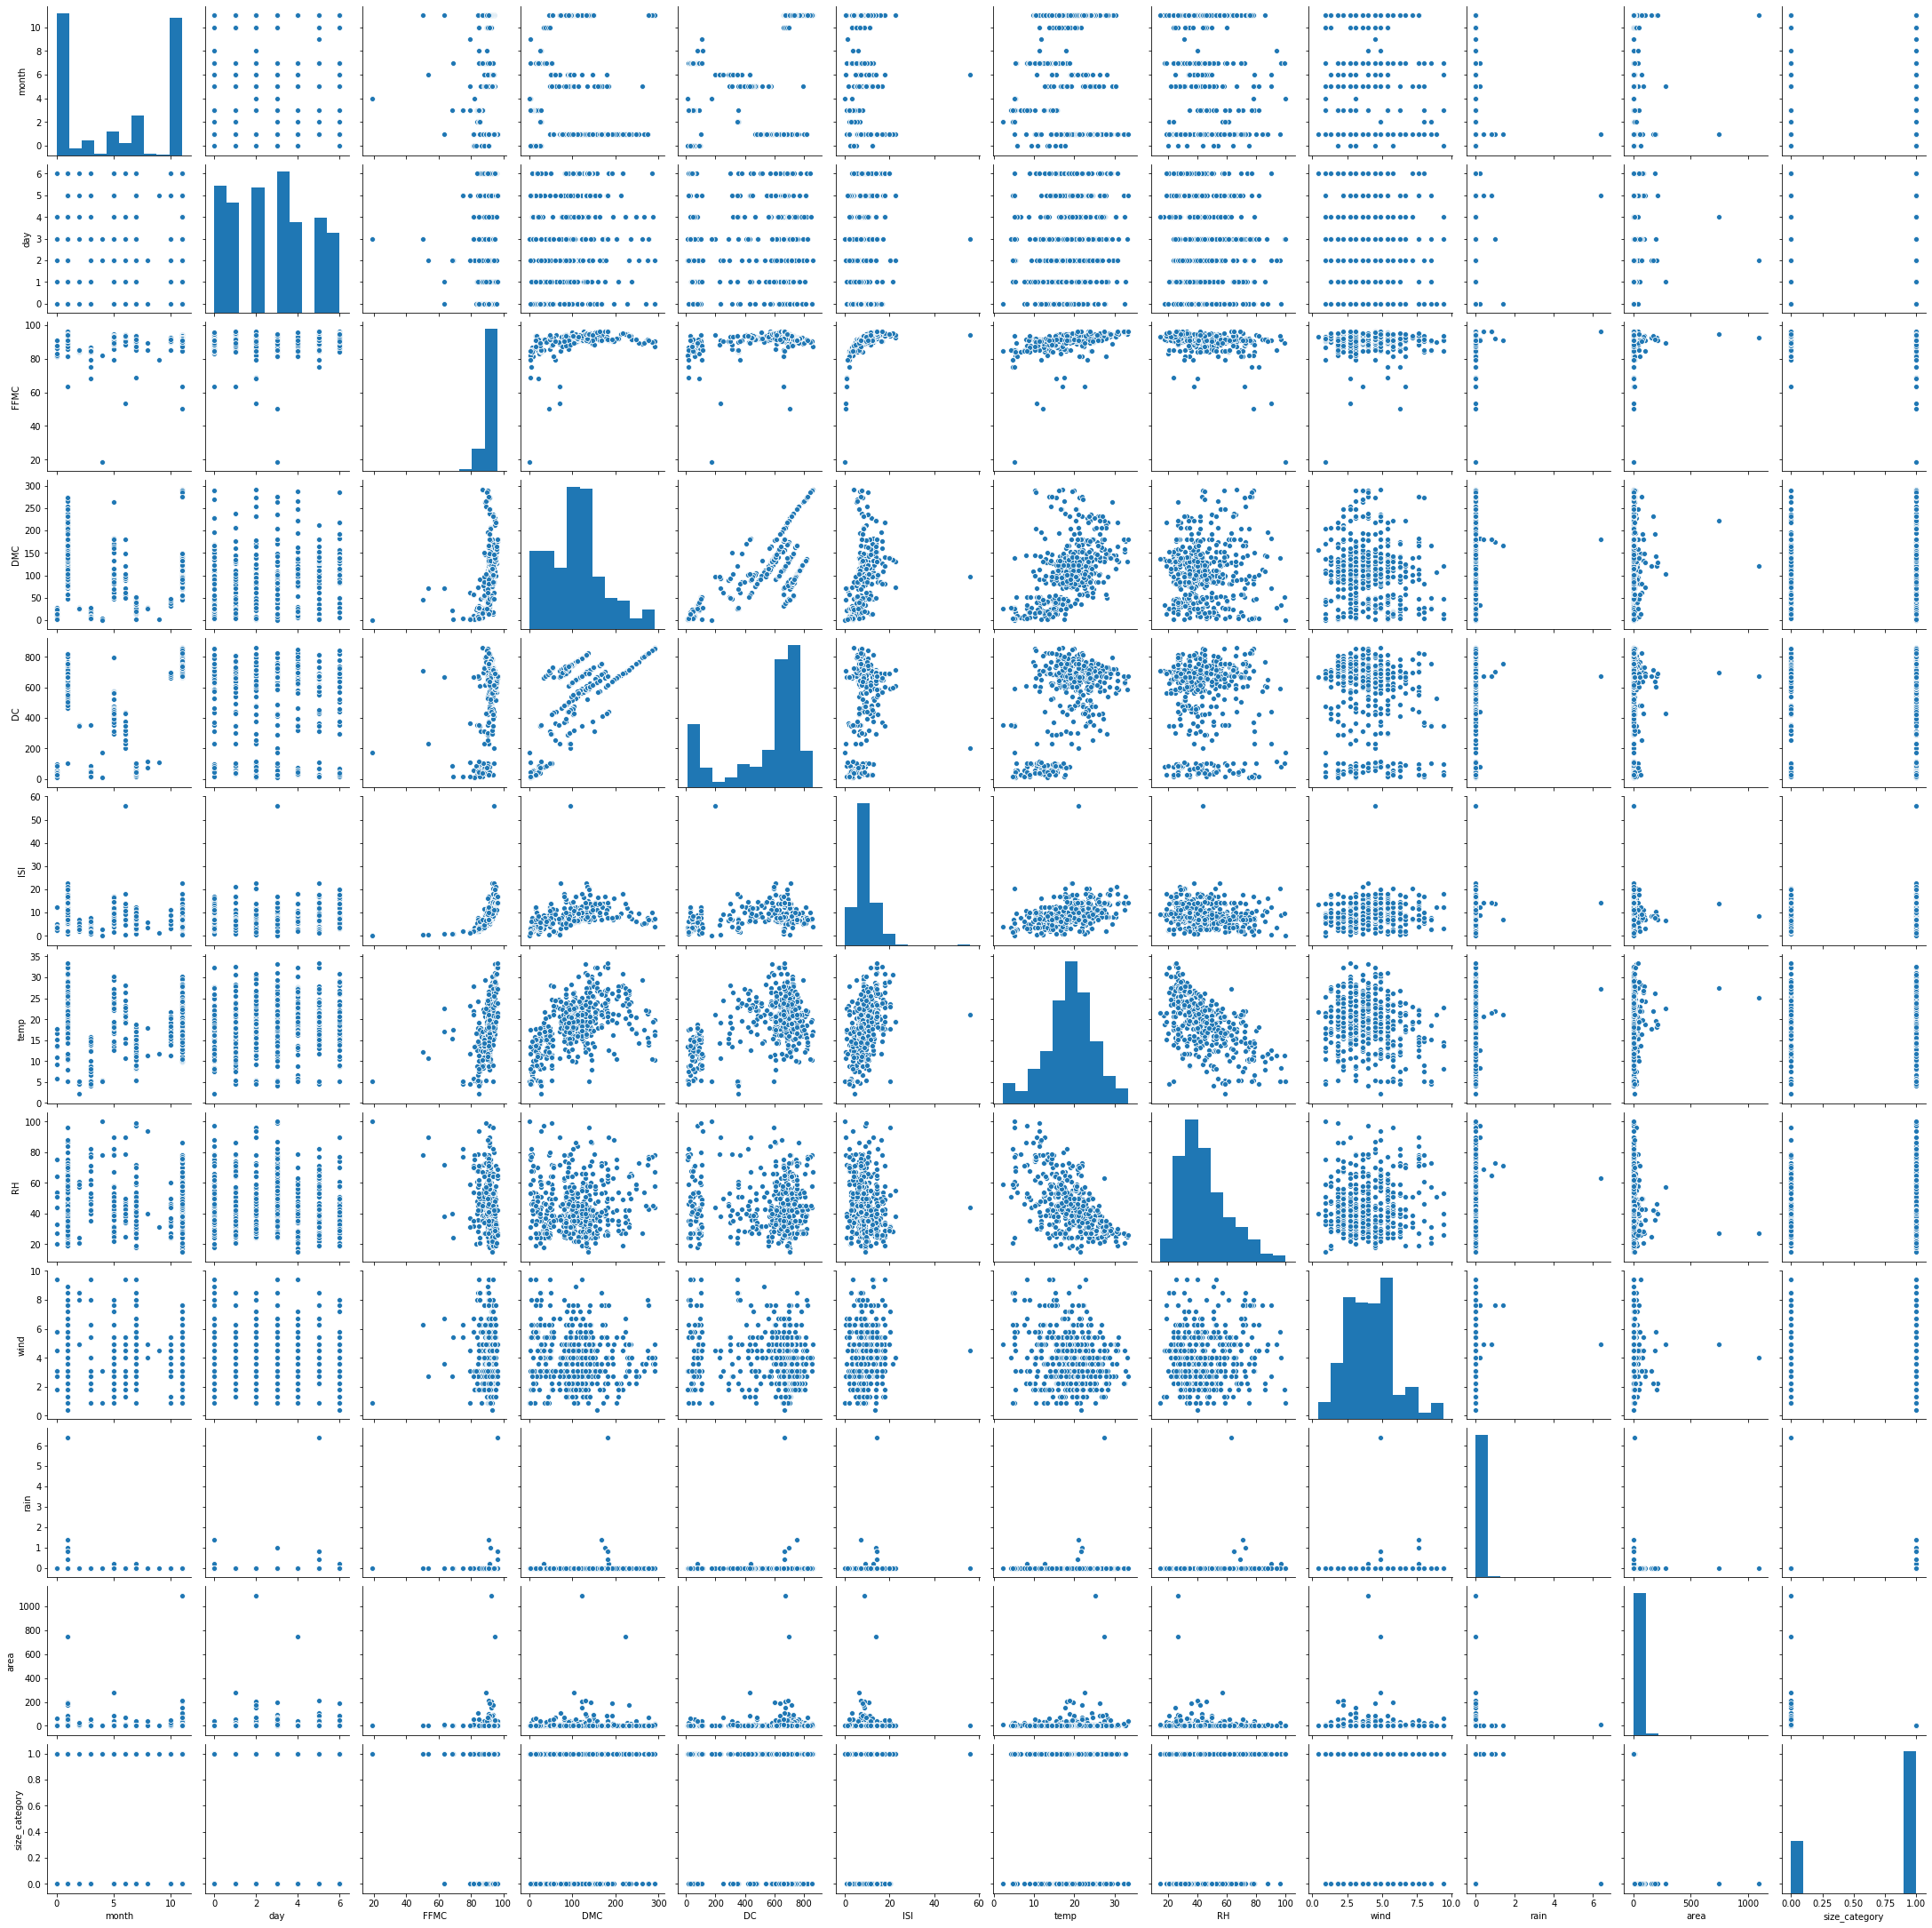

In [19]:
sns.pairplot(data)

plt.show()

In [20]:
temp = StandardScaler().fit_transform(data.drop('size_category',1))

In [21]:
TempData = pd.DataFrame(temp,columns = data.columns[:-1])

In [22]:
TempData['size_category'] = data.size_category

In [23]:
TempData.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,1
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,1
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
xTrain,xTest, yTrain,yTest = train_test_split(TempData.drop('size_category',1),TempData.size_category,test_size=0.1)

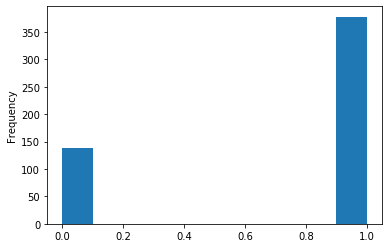

In [26]:
TempData.size_category.plot(kind='hist')

In [27]:
xTrain.shape

(465, 11)

In [28]:
yTrain.value_counts()

1    340
0    125
Name: size_category, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [30]:
xTrain,yTrain = SMOTE(k_neighbors=4).fit_sample(xTrain,yTrain)

In [31]:
yTrain.value_counts()

1    340
0    340
Name: size_category, dtype: int64

In [32]:
xTrain.shape

(680, 11)

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()

In [35]:
model.add(Dense(20,activation='relu',input_shape=(11,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(xTrain,yTrain,epochs=100,verbose=1)

Epoch 1/100
680/680 [==============================] - 0s 392us/step - loss: 0.6856 - accuracy: 0.5574
Epoch 2/100
680/680 [==============================] - 0s 65us/step - loss: 0.6661 - accuracy: 0.6074
Epoch 3/100
680/680 [==============================] - 0s 64us/step - loss: 0.6537 - accuracy: 0.6324
Epoch 4/100
680/680 [==============================] - 0s 66us/step - loss: 0.6407 - accuracy: 0.6500
Epoch 5/100
680/680 [==============================] - 0s 64us/step - loss: 0.6267 - accuracy: 0.6647
Epoch 6/100
680/680 [==============================] - 0s 65us/step - loss: 0.6094 - accuracy: 0.6926
Epoch 7/100
680/680 [==============================] - 0s 64us/step - loss: 0.5915 - accuracy: 0.7088
Epoch 8/100
680/680 [==============================] - 0s 68us/step - loss: 0.5700 - accuracy: 0.7382
Epoch 9/100
680/680 [==============================] - 0s 64us/step - loss: 0.5431 - accuracy: 0.7662
Epoch 10/100
680/680 [==============================] - 0s 64us/step - loss: 0.51

680/680 [==============================] - 0s 54us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 81/100
680/680 [==============================] - 0s 57us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 82/100
680/680 [==============================] - 0s 54us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 83/100
680/680 [==============================] - 0s 63us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 84/100
680/680 [==============================] - 0s 104us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 85/100
680/680 [==============================] - 0s 107us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 86/100
680/680 [==============================] - 0s 94us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 87/100
680/680 [==============================] - 0s 80us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 88/100
680/680 [==============================] - 0s 79us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 89/100
680/680 [==============================] - 0s 76us/step - loss: 0.0030 

In [37]:
model.evaluate(xTrain,yTrain)

680/680 [==============================] - 0s 70us/step


[0.001986039916279397, 1.0]

In [38]:
hisData = pd.DataFrame(model.history.history)

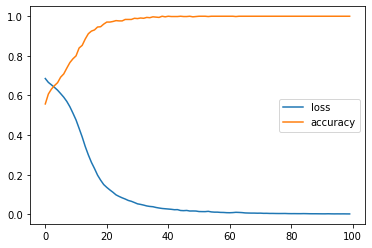

In [39]:
hisData.plot()

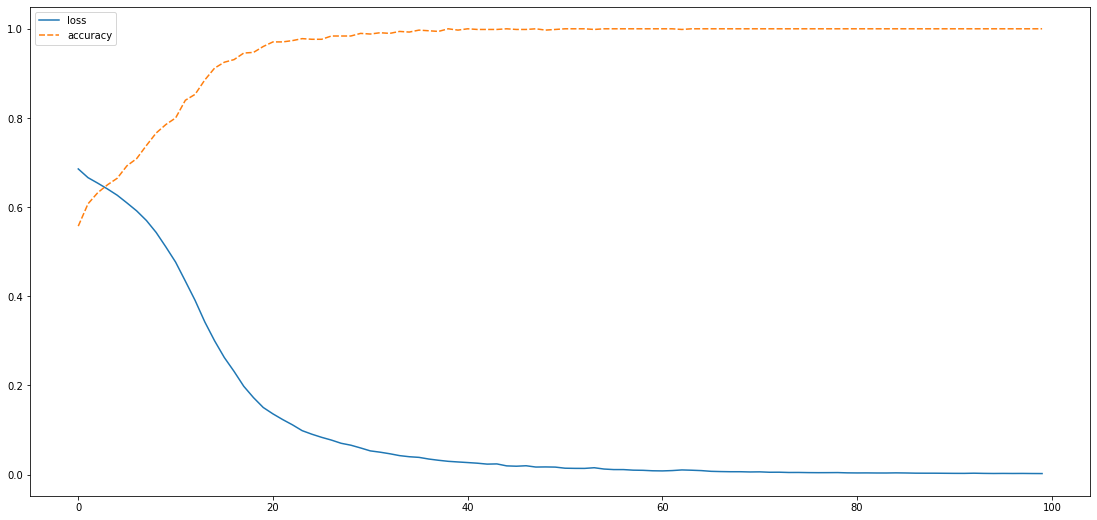

In [40]:
plt.figure(figsize=(19,9))

sns.lineplot(data=hisData)

plt.show()

In [41]:
xTest.shape

(52, 11)

In [42]:
yTest.shape

(52,)

In [43]:
pred = pd.Series(model.predict(xTest).flatten())

In [44]:
type(pred)

pandas.core.series.Series

In [45]:
pred = pred.map(lambda x :1 if abs(x)>0.5 else 0)

In [46]:
pred.shape

(52,)

In [52]:
Prediction = pd.DataFrame({'Actual':yTest,'Predicted':pred.values})

In [53]:
Prediction

,Actual,Predicted
290,1,1
226,0,0
28,1,1
497,0,0
327,1,1
228,0,0
440,1,1
387,1,1
460,1,1
52,1,1


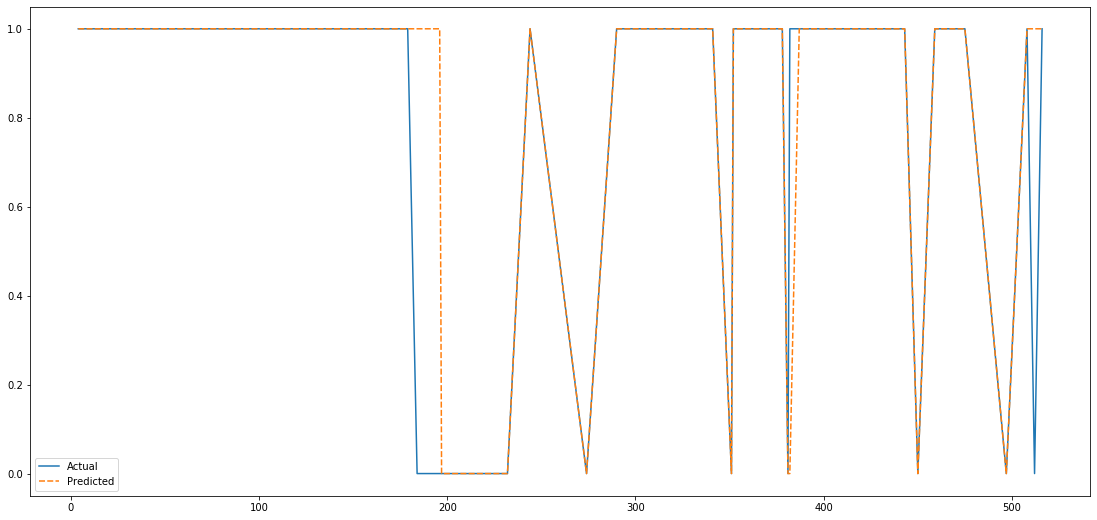

In [55]:
plt.figure(figsize=(19,9))

sns.lineplot(data=Prediction)

plt.show()

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
confusion_matrix(yTest,pred)

array([[11,  3],
       [ 1, 37]])

In [59]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.93      0.97      0.95        38

    accuracy                           0.92        52
   macro avg       0.92      0.88      0.90        52
weighted avg       0.92      0.92      0.92        52

